In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import hiplot as hip
from pickle import load
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pickle
import hiplot

In [2]:
import sys
sys.path.append('../')

In [3]:
from utils import *

In [4]:
#Data directory
data_dir = "../../data/unziped_data/"

#Open data with pickle
data_for_training = "../../data/Data_For_Training/"
with open(data_for_training+"icfes_20141.p", "rb") as f:
    data = pickle.load(f)
    
#print(type(data))

#lista de las columnas con las caracteristicas a predecir
labels_names = ["PUNT_MATEMATICAS", "PUNT_CIENCIAS_SOCIALES", "PUNT_INGLES",
"PUNT_BIOLOGIA", "PUNT_FILOSOFIA", "PUNT_FISICA", "PUNT_QUIMICA", "PUNT_LENGUAJE","ESTU_PUESTO"]

#lista de las columnas que se van a omitir de las caracteristicas
vars_2_omit = ["PUNT_MATEMATICAS", "PUNT_CIENCIAS_SOCIALES", "PUNT_INGLES",
"PUNT_BIOLOGIA", "PUNT_FILOSOFIA", "PUNT_FISICA", "PUNT_QUIMICA", "PUNT_LENGUAJE", "RECAF_PUNT_SOCIALES_CIUDADANAS",
 "RECAF_PUNT_INGLES", "RECAF_PUNT_LECTURA_CRITICA", "RECAF_PUNT_MATEMATICAS", "RECAF_PUNT_C_NATURALES", "ESTU_PUESTO", 
"PUNT_PROFUNDIZA_MATEMATICA", "PUNT_PROFUNDIZA_LENGUAJE", "PUNT_PROFUNDIZA_BIOLOGIA", "PUNT_PROFUNDIZA_CSOCIALES",
"PUNT_INTERDISC_VIOLENCIAYSOC", "PUNT_INTERDISC_MEDIOAMBIENTE","DESEMP_INGLES","DESEMP_PROFUNDIZA_LENGUAJE",
"DESEMP_PROFUNDIZA_MATEMATICA","DESEMP_PROFUNDIZA_BIOLOGIA", "DESEMP_PROFUNDIZA_CSOCIALES"]
#lista de las columnas que se van a omitir de las caracteristicas

NOTA_Z_DATA = ["NOTA_Z_COLE_CODIGO_ICFES_PUNT_MATEMATICAS", "NOTA_Z_COLE_CODIGO_ICFES_PUNT_CIENCIAS_SOCIALES",
"NOTA_Z_COLE_CODIGO_ICFES_PUNT_INGLES", "NOTA_Z_COLE_CODIGO_ICFES_PUNT_BIOLOGIA", "NOTA_Z_COLE_CODIGO_ICFES_PUNT_FILOSOFIA",
"NOTA_Z_COLE_CODIGO_ICFES_PUNT_FISICA", "NOTA_Z_COLE_CODIGO_ICFES_PUNT_QUIMICA", "NOTA_Z_COLE_CODIGO_ICFES_PUNT_LENGUAJE",
"NOTA_Z_COLE_CODIGO_ICFES_ESTU_PUESTO"]

vars_2_omit = vars_2_omit + NOTA_Z_DATA

DECILE = []
for label in labels_names:
    DECILE.append('DECILE_'+label)

print(DECILE)
labels = data[labels_names]
features = data.drop(vars_2_omit,axis=1)
#print(features.shape)
#train/test split
#features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#Scaling the features and the labels

#Loading the scaler
#scaler_features =  load(open('models/scaler_features_20141.pkl', 'rb'))
#scaler_labels   =  load(open('models/scaler_labels_20141.pkl', 'rb'))

#X_train = scaler_features.transform(features_train)
#X_test = scaler_features.transform(features_test)

#Y_train = scaler_labels.transform(labels_train)
#Y_test = scaler_labels.transform(labels_test)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/Data_For_Training/icfes_20141.p'

In [5]:
print(data.columns)

Index(['ESTU_SERETIROCOLEGIO', 'ESTU_PROGORIENTACIONVOCACIONAL',
       'ESTU_PROGPORBUSCANDOCARRERA', 'ESTU_PROGPORCOLOMBIAAPRENDE',
       'ESTU_CUANTOSCOLEGIOESTUDIO', 'ESTU_ANOSCOLEGIOACTUAL',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_NIVELSISBEN', 'ESTU_VECESPRESENTOEXAMEN',
       'ESTU_VALORPENSIONCOLEGIO',
       ...
       'ESTU_PROGRAMADESEADO_Agrarias', 'ESTU_PROGRAMADESEADO_Artes',
       'ESTU_PROGRAMADESEADO_Ciencias', 'ESTU_PROGRAMADESEADO_Economicas',
       'ESTU_PROGRAMADESEADO_Humanas', 'ESTU_PROGRAMADESEADO_Ingenierias',
       'ESTU_PROGRAMADESEADO_Militares', 'ESTU_PROGRAMADESEADO_Pedagogia',
       'ESTU_PROGRAMADESEADO_Salud', 'ESTU_PROGRAMADESEADO_Veterinaria'],
      dtype='object', length=278)


# MODEL SCORES TO DATE

# Z Note

In [6]:
score = {}
for label in NOTA_Z_DATA:
    score[label] = Calculate_and_sort_scores(label, features)

In [7]:
for i in NOTA_Z_DATA:
    print(i)

NOTA_Z_COLE_CODIGO_ICFES_PUNT_MATEMATICAS
NOTA_Z_COLE_CODIGO_ICFES_PUNT_CIENCIAS_SOCIALES
NOTA_Z_COLE_CODIGO_ICFES_PUNT_INGLES
NOTA_Z_COLE_CODIGO_ICFES_PUNT_BIOLOGIA
NOTA_Z_COLE_CODIGO_ICFES_PUNT_FILOSOFIA
NOTA_Z_COLE_CODIGO_ICFES_PUNT_FISICA
NOTA_Z_COLE_CODIGO_ICFES_PUNT_QUIMICA
NOTA_Z_COLE_CODIGO_ICFES_PUNT_LENGUAJE
NOTA_Z_COLE_CODIGO_ICFES_ESTU_PUESTO


In [8]:
def dict_to_list(dictionary):
    keys = []
    scores_keys=[]
    for element in dictionary:
        keys.append(element)
        scores_keys.append(dictionary[element])
    return keys, scores_keys

def bars_plot_scores(ln, N, score):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    keys, scores_keys = dict_to_list(score[ln])
    ax.bar(keys[:N], scores_keys[:N])
    print(keys[:N], scores_keys[:N])
    plt.xticks(rotation=90)
    plt.title('Score' + ln)
    plt.show()


['FAMI_TIENEAUTOMOVIL', 'ESTU_PUNT_ESPERADO_INGLES', 'COLE_NATURALEZA', 'FAMI_TIENE_CELULAR', 'FAMI_TELEFONO', 'FAMI_EDUCACIONPADRE_Postgrado', 'ESTU_PROGRAMADESEADO_Ingenierias', 'FAMI_EDUCACIONMADRE_Postgrado', 'ESTU_SERETIROCOLEGIO', 'ESTU_ANOSPREESCOLAR', 'COLE_CALENDARIO_B', 'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa', 'ESTU_REPROBOQUINTO', 'FAMI_TIENEMICROONDAS', 'COLE_COD_MCPIO_UBICACIONdic_mun_pesorelativo', 'FAMI_OCUPACIONPADRE_Pequeño empresario', 'FAMI_OCUPACIONPADRE_Empresario', 'COLE_GENERO_MASCULINO', 'ESTU_COD_RESIDE_MCPIOdic_mun_valoragregado', 'FAMI_EDUCACIONMADRE_Educación profesional completa'] [4893.169476515001, 2437.3052043300027, 722.6177966200001, 610.9996901199997, 512.6425110179999, 502.1780664799998, 354.9625372799998, 341.41970324000005, 340.0397538589999, 322.17657811000004, 297.7139304000001, 234.80492673999998, 205.73455341000005, 202.32139741199998, 198.268552754, 173.48246487, 170.81875643999996, 159.58142155999994, 159.36874803800004, 137.

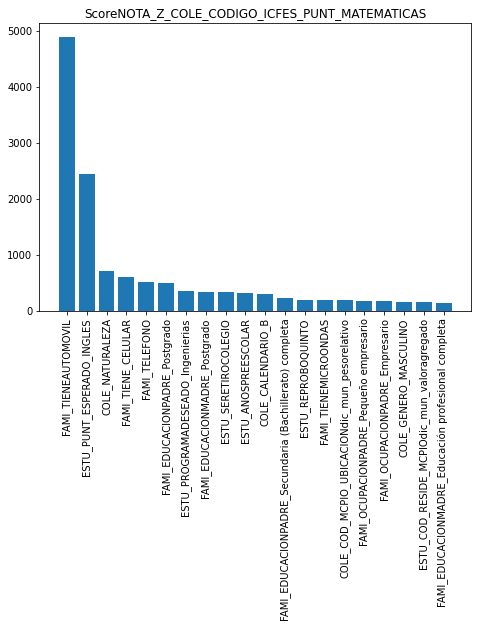

['ESTU_PUNT_ESPERADO_INGLES', 'FAMI_TIENEAUTOMOVIL', 'FAMI_EDUCACIONPADRE_Postgrado', 'ESTU_SERETIROCOLEGIO', 'Cantidad_Companeros_COLE_CODIGO_ICFES', 'FAMI_EDUCACIONMADRE_Postgrado', 'FAMI_TIENEMICROONDAS', 'ESTU_REPROBOQUINTO', 'FAMI_TIENE_CELULAR', 'FAMI_TELEFONO', 'COLE_NATURALEZA', 'ESTU_ANOSPREESCOLAR', 'ESTU_SALARIO_ESPERADOPROFESI', 'FAMI_OCUPACIONPADRE_Empresario', 'COLE_CALENDARIO_B', 'ESTU_COD_RESIDE_MCPIOdic_mun_pesorelativo', 'ESTU_COD_RESIDE_MCPIOdic_mun_poblacion', 'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa', 'FAMI_INGRESOFMILIARMENSUAL', 'ESTU_COD_MCPIO_PRESENTACIONdic_mun_pesorelativo'] [4694.918832890001, 2342.541604779999, 1341.8800793200005, 953.7253111500004, 913.1719855600004, 899.4086839999997, 840.2280574999999, 740.6234503000002, 691.1215320900001, 664.8597381699999, 640.46689874, 637.1656573699997, 574.23143336, 482.66124413999995, 466.98136990999996, 446.1157958599999, 440.42339317999983, 398.4581220200002, 375.6601212099998, 350.40725803000004]


['ESTU_PUNT_ESPERADO_INGLES', 'ESTU_SERETIROCOLEGIO', 'FAMI_TIENE_CELULAR', 'ESTU_PROGPORINTERESPERSONAL', 'FAMI_EDUCACIONPADRE_Postgrado', 'FAMI_TIENEAUTOMOVIL', 'ESTU_REPROBOQUINTO', 'FAMI_TELEFONO', 'FAMI_TIENEMICROONDAS', 'ESTU_ANOSPREESCOLAR', 'COLE_CALENDARIO_B', 'ESTU_COD_RESIDE_MCPIOdic_mun_pesorelativo', 'ESTU_COD_RESIDE_MCPIOdic_mun_poblacion', 'COLE_COD_MCPIO_UBICACIONdic_mun_pesorelativo', 'ESTU_COD_MCPIO_PRESENTACIONdic_mun_pesorelativo', 'COLE_COD_MCPIO_UBICACIONdic_mun_poblacion', 'FAMI_EDUCACIONPADRE_Educación profesional completa', 'Cantidad_Companeros_COLE_CODIGO_ICFES', 'FAMI_EDUCACIONMADRE_Educación profesional completa', 'FAMI_OCUPACIONPADRE_Empresario'] [8837.962352917999, 2586.3582576780036, 2434.0329215600013, 1732.8153490299997, 1678.8797856489998, 1550.2227886969997, 1516.7377539230008, 1494.5756191960004, 1381.9625463109996, 1024.0411275109998, 971.5670930040003, 814.2983175409995, 774.8148554169996, 724.6896170540003, 719.1679244979998, 645.362114853, 609.62

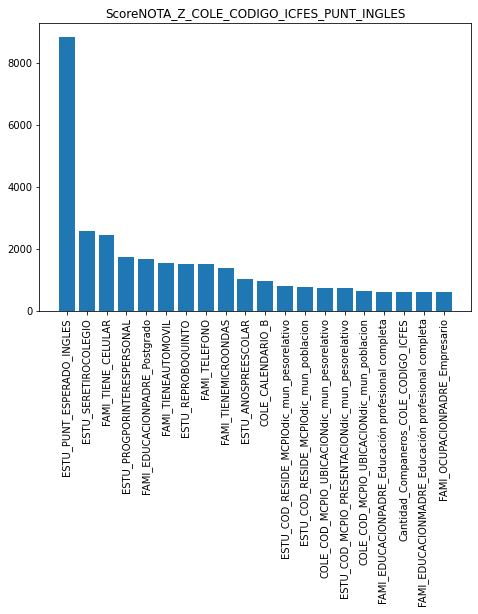

['ESTU_PUNT_ESPERADO_INGLES', 'FAMI_TIENEAUTOMOVIL', 'FAMI_EDUCACIONPADRE_Postgrado', 'FAMI_OCUPACIONPADRE_Empleado de nivel técnico o profesional', 'FAMI_TIENE_CELULAR', 'FAMI_EDUCACIONMADRE_Postgrado', 'COLE_NATURALEZA', 'FAMI_TELEFONO', 'ESTU_SERETIROCOLEGIO', 'FAMI_OCUPACIONPADRE_Empresario', 'ESTU_ANOSPREESCOLAR', 'FAMI_OCUPACIONPADRE_Pequeño empresario', 'Cantidad_Companeros_COLE_CODIGO_ICFES', 'FAMI_TIENEMICROONDAS', 'COLE_CALENDARIO_B', 'FAMI_PISOSHOGAR_Madera pulida, baldosa, tableta, mármol, alfombra', 'ESTU_COD_RESIDE_MCPIOdic_mun_poblacion', 'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa', 'FAMI_EDUCACIONMADRE_Técnica o tecnológica completa', 'ESTU_COD_MCPIO_PRESENTACIONdic_mun_pesorelativo'] [1529.093321980001, 848.4547622899996, 362.87846086999997, 328.42457060000004, 301.58928166999993, 268.8527146299999, 253.47933584999998, 246.52080825, 199.52226871000005, 182.32879483, 166.15794256, 157.76725293999996, 134.93582515000003, 131.02668382000002, 121.633976714, 12

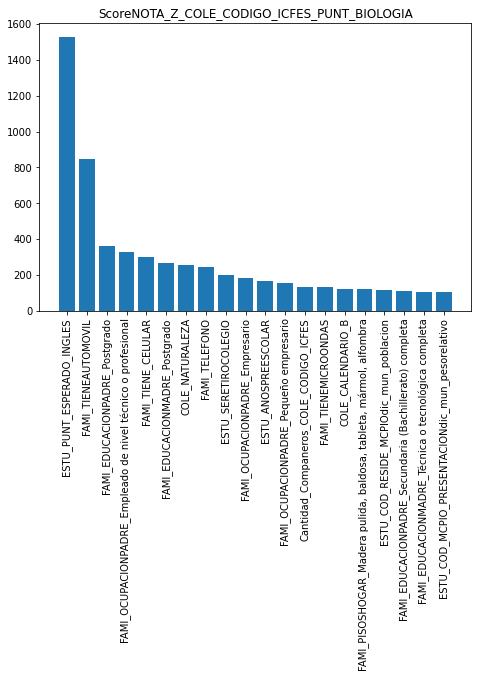

['ESTU_PUNT_ESPERADO_INGLES', 'FAMI_EDUCACIONPADRE_Postgrado', 'ESTU_SERETIROCOLEGIO', 'FAMI_TIENE_CELULAR', 'FAMI_TELEFONO', 'ESTU_ANOSPREESCOLAR', 'ESTU_REPROBOQUINTO', 'FAMI_EDUCACIONMADRE_Postgrado', 'ESTU_COD_RESIDE_MCPIOdic_mun_poblacion', 'ESTU_COD_RESIDE_MCPIOdic_mun_pesorelativo', 'FAMI_TIENEAUTOMOVIL', 'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa', 'ESTU_PROGRAMADESEADO_Humanas', 'ESTU_COD_RESIDE_MCPIOdic_mun_valoragregado', 'COLE_NATURALEZA', 'FAMI_OCUPACIONPADRE_Empleado de nivel técnico o profesional', 'FAMI_TIENEMICROONDAS', 'FAMI_EDUCACIONMADRE_Educación profesional completa', 'COLE_CALENDARIO_B', 'Cantidad_Companeros_COLE_CODIGO_ICFES'] [5902.312447604001, 1864.6932079000003, 1402.6437241865995, 933.5551512699996, 859.0469581800005, 794.9061976500004, 782.36186129, 750.4406089399998, 692.0858669289998, 658.7757378849999, 622.9462827909998, 619.4825138300002, 599.07626141, 591.6962579169999, 591.2500433000002, 569.70774671, 555.5410538299999, 495.12598148, 467

['FAMI_TIENEAUTOMOVIL', 'ESTU_PUNT_ESPERADO_INGLES', 'ESTU_SERETIROCOLEGIO', 'FAMI_TELEFONO', 'COLE_NATURALEZA', 'FAMI_EDUCACIONPADRE_Postgrado', 'FAMI_TIENE_CELULAR', 'ESTU_ANOSPREESCOLAR', 'FAMI_TIENEMICROONDAS', 'ESTU_COD_RESIDE_MCPIOdic_mun_pesorelativo', 'ESTU_COD_RESIDE_MCPIOdic_mun_poblacion', 'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa', 'ESTU_REPROBOQUINTO', 'COLE_CALENDARIO_B', 'COLE_COD_MCPIO_UBICACIONdic_mun_pesorelativo', 'COLE_GENERO_MIXTO', 'Cantidad_Companeros_COLE_CODIGO_ICFES', 'COLE_COD_MCPIO_UBICACIONdic_mun_poblacion', 'FAMI_EDUCACIONMADRE_Postgrado', 'COLE_COD_MCPIO_UBICACIONdic_mun_valoragregado'] [7017.114862560001, 4210.892963399999, 1207.3851756400002, 816.5354751600001, 796.8060454899995, 668.5999515099999, 614.9640906000002, 507.3680905100002, 443.21628183000007, 441.6512396199997, 376.9827090999999, 365.46903638999987, 350.4543409500001, 325.83886752, 323.83206047000004, 286.63492471, 283.84080765000016, 279.3523314, 275.93736447999987, 268.5686

['FAMI_TIENEAUTOMOVIL', 'ESTU_PUNT_ESPERADO_INGLES', 'FAMI_EDUCACIONPADRE_Postgrado', 'COLE_NATURALEZA', 'COLE_CALENDARIO_B', 'FAMI_OCUPACIONPADRE_Empresario', 'FAMI_TIENE_CELULAR', 'ESTU_ANOSPREESCOLAR', 'COLE_JORNADA_COMPLETA', 'FAMI_OCUPACIONPADRE_Empleado de nivel técnico o profesional', 'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa', 'FAMI_EDUCACIONMADRE_Educación profesional completa', 'FAMI_EDUCACIONMADRE_Postgrado', 'FAMI_OCUPACIONPADRE_Pequeño empresario', 'FAMI_EDUCACIONPADRE_Educación profesional completa', 'FAMI_PISOSHOGAR_Cemento, gravilla, ladrillo', 'ESTU_PROGRAMADESEADO_Ingenierias', 'FAMI_TELEFONO', 'ESTU_SERETIROCOLEGIO', 'FAMI_OCUPACIONPADRE_Empleado de nivel directivo'] [1561.4670658969997, 1456.150293753999, 551.9442039559998, 369.62588688399995, 304.630230104, 302.03837397, 228.907891601, 220.30935668799998, 5.13145781, 124.21142273000001, 110.79509252999998, 110.34167321399998, 100.765590454, 95.58373033999996, 93.870251918, 86.32279669, 85.846292568999

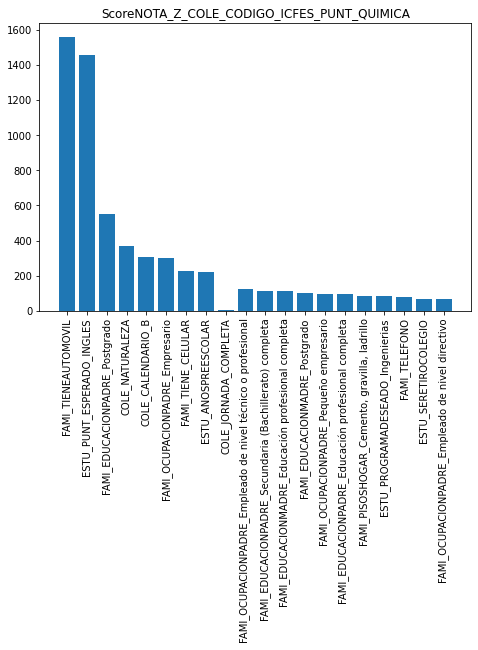

['ESTU_PUNT_ESPERADO_INGLES', 'ESTU_SERETIROCOLEGIO', 'FAMI_TIENEMICROONDAS', 'FAMI_TELEFONO', 'FAMI_TIENE_CELULAR', 'ESTU_ANOSPREESCOLAR', 'FAMI_OCUPACIONPADRE_Empresario', 'ESTU_COD_MCPIO_PRESENTACIONdic_mun_pesorelativo', 'COLE_COD_MCPIO_UBICACIONdic_mun_valoragregado', 'FAMI_EDUCACIONPADRE_Postgrado', 'FAMI_EDUCACIONPADRE_Primaria completa', 'ESTU_COD_RESIDE_MCPIOdic_mun_pesorelativo', 'ESTU_INSTPORPRESTIGIO', 'ESTU_COD_RESIDE_MCPIOdic_mun_poblacion', 'ESTU_REPROBOQUINTO', 'FAMI_EDUCACIONMADRE_Postgrado', 'COLE_CALENDARIO_B', 'ESTU_ANOMATRICULAPRIMERO', 'FAMI_TIENEAUTOMOVIL', 'FAMI_INGRESOFMILIARMENSUAL'] [967.6899143999999, 311.58358626, 154.93562024, 144.35257339, 126.10544942999998, 119.74289088000002, 115.39181570999999, 104.07048225000003, 99.84608585000001, 95.89428274000001, 94.04643295000001, 90.00430014, 83.26563019, 80.69824911000002, 77.10355638, 76.52855393, 74.43924095999998, 71.34560179, 68.05782265999999, 62.03013803]


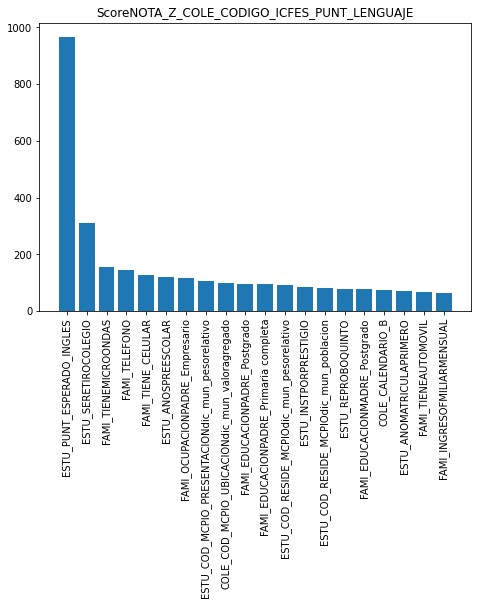

['ESTU_PUNT_ESPERADO_INGLES', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENE_CELULAR', 'ESTU_SERETIROCOLEGIO', 'FAMI_EDUCACIONPADRE_Postgrado', 'FAMI_TELEFONO', 'COLE_CALENDARIO_B', 'FAMI_TIENEMICROONDAS', 'COLE_NATURALEZA', 'FAMI_EDUCACIONMADRE_Postgrado', 'ESTU_COD_RESIDE_MCPIOdic_mun_poblacion', 'FAMI_OCUPACIONPADRE_Empresario', 'FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa', 'ESTU_ANOSPREESCOLAR', 'ESTU_REPROBOQUINTO', 'COLE_JORNADA_COMPLETA', 'COLE_COD_MCPIO_UBICACIONdic_mun_pesorelativo', 'FAMI_EDUCACIONMADRE_Educación profesional completa', 'COLE_COD_MCPIO_UBICACIONdic_mun_poblacion', 'FAMI_EDUCACIONPADRE_Primaria completa'] [3482.8450435269983, 1656.7025111700002, 763.5333649000005, 512.44301362, 509.36312837, 408.26512855999994, 351.15072139, 349.77661595, 334.6254785199999, 304.77034811, 291.2467297600001, 282.35958764000003, 280.21970252, 274.60376974000013, 222.92698962999998, 3.94222903, 219.41178349000003, 214.23250522999996, 210.55407803, 189.89707889999997]


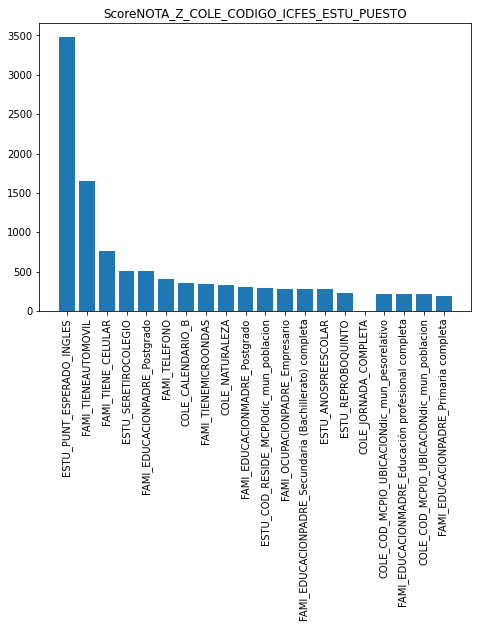

In [9]:
bars_plot_scores('NOTA_Z_COLE_CODIGO_ICFES_PUNT_MATEMATICAS', 20, score)
# Six most important variables
# ESTU_ANOMATRICULASEXTO
# ESTU_NACIONALIDAD
# FAMI_TIENEINTERNET
# FAMI_EDUCACIONPADRE_Postgrado
# ESTU_REPROBODECIMO
# ESTU_PROGRAMADESEADO_Ingenierias


bars_plot_scores('NOTA_Z_COLE_CODIGO_ICFES_PUNT_CIENCIAS_SOCIALES', 20, score)
# Six most important variables
# ESTU_NACIONALIDAD
# ESTU_ANOMATRICULASEXTO
# ESTU_SERETIROCOLEGIO
# FAMI_EDUCACIONPADRE_Postgrado
# ESTU_REPROBODECIMO
# ESTU_ANOSCOLEGIOACTUAL

bars_plot_scores('NOTA_Z_COLE_CODIGO_ICFES_PUNT_INGLES', 20, score)
# Six most important variables
# ESTU_NACIONALIDAD
# ESTU_REPROBODECIMO
# FAMI_TIENELAVADORA
# ESTU_SERETIROCOLEGIO
# FAMI_EDUCACIONPADRE_Postgrado

bars_plot_scores('NOTA_Z_COLE_CODIGO_ICFES_PUNT_BIOLOGIA', 20, score)
# Six most important variables
# ESTU_NACIONALIDAD
# ESTU_ANOMATRICULASEXTO
# FAMI_EDUCACIONPADRE_Postgrado
# ESTU_REPROBODECIMO
# FAMI_OCUPACIONPADRE_Empleado de nivel técnico o profesional
# 

bars_plot_scores('NOTA_Z_COLE_CODIGO_ICFES_PUNT_FILOSOFIA', 20, score)
# Six most important variables
# ESTU_NACIONALIDAD
# FAMI_EDUCACIONPADRE_Postgrado
# ESTU_SERETIROCOLEGIO
# ESTU_REPROBODECIMO
# ESTU_ANOTERMINOQUINTO
# ESTU_ANOMATRICULASEXTO
# COLE_AREA_UBICACION


bars_plot_scores('NOTA_Z_COLE_CODIGO_ICFES_PUNT_FISICA', 20, score)
# Six most important variables
# ESTU_ANOMATRICULASEXTO
# ESTU_NACIONALIDAD
# ESTU_REPROBODECIMO
# ESTU_SERETIROCOLEGIO
# FAMI_EDUCACIONPADRE_Postgrado
# ESTU_ANOSCOLEGIOACTUAL

bars_plot_scores('NOTA_Z_COLE_CODIGO_ICFES_PUNT_QUIMICA', 20, score)
# Six most important variables
# ESTU_NACIONALIDAD
# ESTU_ANOMATRICULASEXTO
# FAMI_EDUCACIONPADRE_Postgrado
# FAMI_OCUPACIONPADRE_Empresario
# FAMI_TIENEINTERNET
# ESTU_REPROBODECIMO
# COLE_AREA_UBICACION

bars_plot_scores('NOTA_Z_COLE_CODIGO_ICFES_PUNT_LENGUAJE', 20, score)
# Six most important variables
# ESTU_NACIONALIDAD
# ESTU_REPROBODECIMO
# FAMI_OCUPACIONPADRE_Empresario
# FAMI_EDUCACIONPADRE_Postgrado
# ESTU_ANOTERMINOQUINTO
# ESTU_INSTPORUBICACION
# ESTU_SERETIROCOLEGIO

bars_plot_scores('NOTA_Z_COLE_CODIGO_ICFES_ESTU_PUESTO', 20, score)
# Six most important variables
# ESTU_NACIONALIDAD
# ESTU_ANOMATRICULASEXTO
# ESTU_REPROBODECIMO
# FAMI_EDUCACIONPADRE_Postgrado
# FAMI_OCUPACIONPADRE_Empresario
# COLE_JORNADA_COMPLETA
# COLE_CALENDARIO_B

# Deciles by Subject Score

In [10]:
score_DECILE = {}
for label in DECILE:
    score_DECILE[label] = Calculate_and_sort_scores(label, features)

In [11]:
for element in DECILE:
    print(element)

DECILE_PUNT_MATEMATICAS
DECILE_PUNT_CIENCIAS_SOCIALES
DECILE_PUNT_INGLES
DECILE_PUNT_BIOLOGIA
DECILE_PUNT_FILOSOFIA
DECILE_PUNT_FISICA
DECILE_PUNT_QUIMICA
DECILE_PUNT_LENGUAJE
DECILE_ESTU_PUESTO


['FAMI_TIENE_CELULAR', 'COLE_JORNADA_COMPLETA', 'FAMI_TELEFONO', 'COLE_CALENDARIO_B', 'ESTU_PUNT_ESPERADO_INGLES', 'ESTU_SERETIROCOLEGIO', 'ESTU_REPROBOQUINTO'] [81103.73348880404, 71.674009218, 26727.597214003115, 16068.902710889008, 14982.808162117315, 9007.02660227298, 7654.917718917584]


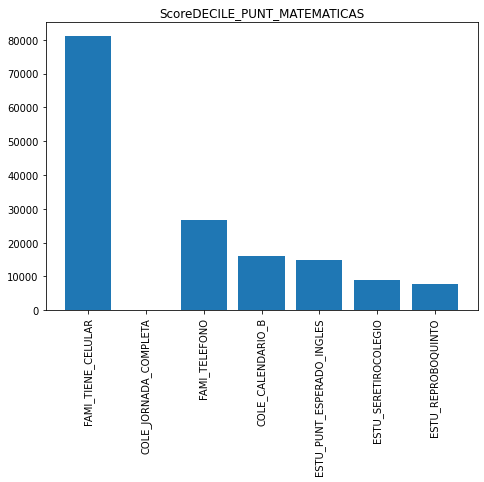

['FAMI_TIENE_CELULAR', 'COLE_CALENDARIO_B', 'COLE_JORNADA_COMPLETA', 'FAMI_TELEFONO', 'ESTU_REPROBOQUINTO', 'ESTU_PUNT_ESPERADO_INGLES', 'ESTU_SERETIROCOLEGIO'] [46766.04708242106, 11045.49672344799, 871.56958749, 8465.947314385994, 6797.093364520009, 6587.5726108909985, 6147.1534569090045]


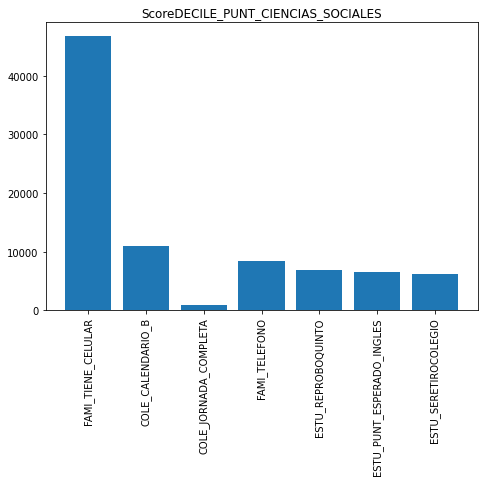

['FAMI_TIENE_CELULAR', 'FAMI_TELEFONO', 'ESTU_REPROBOQUINTO', 'ESTU_PUNT_ESPERADO_INGLES', 'COLE_CALENDARIO_B', 'FAMI_NIVELSISBEN', 'ESTU_SERETIROCOLEGIO'] [212725.2684526168, 95268.04172687995, 38455.52630719327, 21640.263717325884, 20828.400051419, 13162.041170612998, 12401.91654631706]


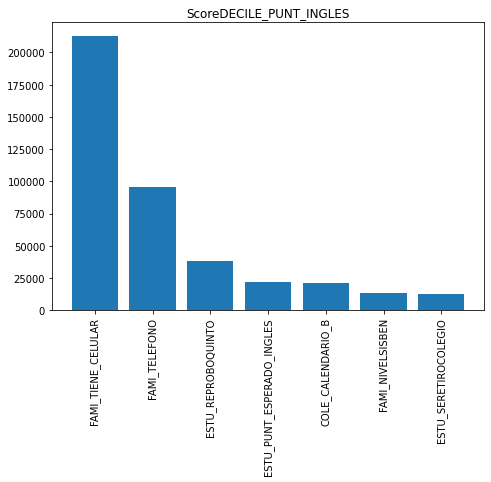

['FAMI_TIENE_CELULAR', 'FAMI_TELEFONO', 'COLE_JORNADA_COMPLETA', 'COLE_CALENDARIO_B', 'ESTU_PUNT_ESPERADO_INGLES', 'ESTU_SERETIROCOLEGIO', 'ESTU_REPROBOQUINTO'] [48155.45719748596, 23012.969236329005, 3923.28527092, 16731.201695159998, 10589.386207097015, 8653.402163395986, 8629.522201820995]


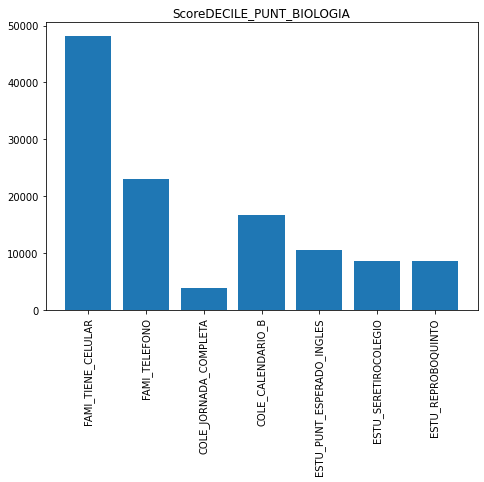

['FAMI_TIENE_CELULAR', 'COLE_CALENDARIO_B', 'COLE_JORNADA_COMPLETA', 'FAMI_TELEFONO', 'ESTU_PUNT_ESPERADO_INGLES', 'ESTU_SERETIROCOLEGIO', 'ESTU_REPROBOQUINTO'] [68824.88170109196, 45574.08487228, 1215.8543648779994, 14057.411867585986, 11482.677973242018, 8851.161872929995, 6216.9169909479915]


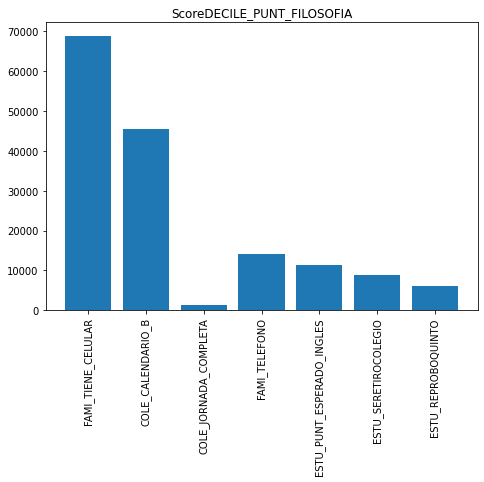

['FAMI_TIENE_CELULAR', 'COLE_CALENDARIO_B', 'FAMI_TELEFONO', 'COLE_JORNADA_COMPLETA', 'ESTU_PUNT_ESPERADO_INGLES', 'ESTU_SERETIROCOLEGIO', 'FAMI_TIENEAUTOMOVIL'] [47934.872097602034, 28227.455525190016, 13323.337390945004, 625.1618450250002, 11526.221181473009, 8270.711369141998, 6273.019201585005]


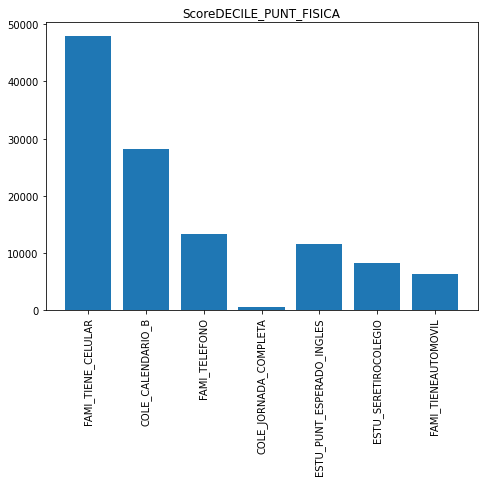

['FAMI_TIENE_CELULAR', 'COLE_CALENDARIO_B', 'COLE_JORNADA_COMPLETA', 'FAMI_TELEFONO', 'ESTU_PUNT_ESPERADO_INGLES', 'ESTU_SERETIROCOLEGIO', 'ESTU_REPROBOQUINTO'] [53051.001836340954, 30284.209229011027, 6365.337301808998, 16214.131698965994, 11324.696751186026, 9179.02986125101, 6352.65751785409]


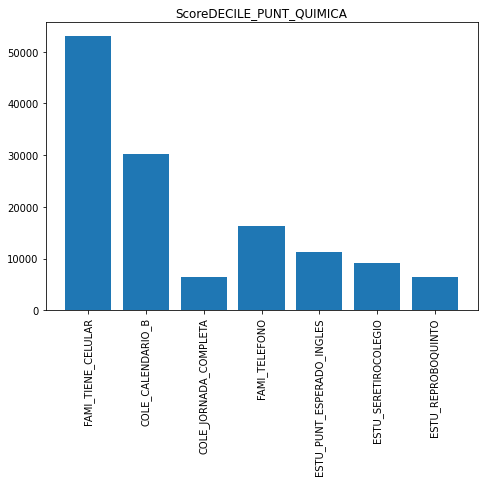

['FAMI_TIENE_CELULAR', 'COLE_CALENDARIO_B', 'COLE_JORNADA_COMPLETA', 'ESTU_PUNT_ESPERADO_INGLES', 'FAMI_TELEFONO', 'ESTU_SERETIROCOLEGIO', 'ESTU_REPROBOQUINTO'] [58698.043914207105, 25182.71406330703, 5148.158140269001, 13622.08169109102, 11246.010458370803, 8338.650894390286, 8102.235381570902]


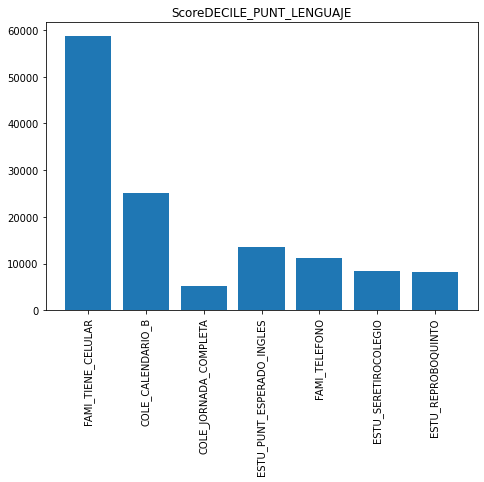

['FAMI_TIENE_CELULAR', 'COLE_CALENDARIO_B', 'FAMI_TELEFONO', 'COLE_JORNADA_COMPLETA', 'ESTU_PUNT_ESPERADO_INGLES', 'COLE_CALENDARIO_A', 'ESTU_REPROBOQUINTO'] [42346.262601904695, 35653.66967589, 20110.573533309987, 5496.886055529999, 12374.24162814786, 11124.443369342398, 9233.22919012708]


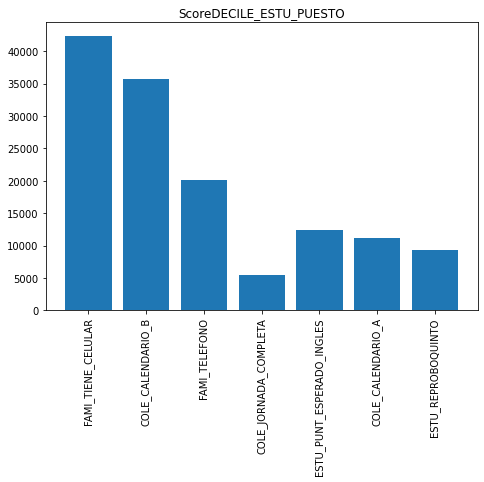

In [13]:
bars_plot_scores('DECILE_PUNT_MATEMATICAS', 7, score_DECILE)
# Six most important variables
# ESTU_REPROBODECIMO
# ESTU_ANOSCOLEGIOACTUAL
# ESTU_NACIONALIDAD
# COLE_CALENDARIO_B
# ESTU_SERETIROCOLEGIO
# ESTU_INSTPOROPORTUNIDADES


bars_plot_scores('DECILE_PUNT_CIENCIAS_SOCIALES', 7, score_DECILE)
# Six most important variables
# ESTU_REPROBODECIMO
# ESTU_ANOSCOLEGIOACTUAL
# COLE_CALENDARIO_B
# ESTU_NACIONALIDAD
# ESTU_INSTPOROPORTUNIDADES
# ESTU_SERETIROCOLEGIO


bars_plot_scores('DECILE_PUNT_INGLES', 7, score_DECILE)
# Six most important variables
# ESTU_REPROBODECIMO
# ESTU_ANOSCOLEGIOACTUAL
# ESTU_INSTPOROPORTUNIDADES
# ESTU_NACIONALIDAD
# COLE_CALENDARIO_B
# ESTU_SERETIROCOLEGIO


bars_plot_scores('DECILE_PUNT_BIOLOGIA', 7, score_DECILE)
# Six most important variables
# ESTU_REPROBODECIMO
# ESTU_ANOSCOLEGIOACTUAL
# COLE_CALENDARIO_B
# ESTU_NACIONALIDAD
# ESTU_SERETIROCOLEGIO
# ESTU_INSTPOROPORTUNIDADES


bars_plot_scores('DECILE_PUNT_FILOSOFIA', 7, score_DECILE)
# Six most important variables
# ESTU_REPROBODECIMO
# COLE_CALENDARIO_B
# ESTU_ANOSCOLEGIOACTUAL
# ESTU_NACIONALIDAD
# ESTU_INSTPOROPORTUNIDADES
# ESTU_SERETIROCOLEGIO


bars_plot_scores('DECILE_PUNT_FISICA', 7, score_DECILE)
# Six most important variables
# ESTU_REPROBODECIMO
# COLE_CALENDARIO_B
# ESTU_NACIONALIDAD
# ESTU_ANOSCOLEGIOACTUAL
# ESTU_SERETIROCOLEGIO
# ESTU_ANOMATRICULASEXTO


bars_plot_scores('DECILE_PUNT_QUIMICA', 7, score_DECILE)
# Six most important variables
# ESTU_REPROBODECIMO
# COLE_CALENDARIO_B
# ESTU_ANOSCOLEGIOACTUAL
# ESTU_NACIONALIDAD
# ESTU_SERETIROCOLEGIO
# ESTU_INSTPOROPORTUNIDADES


bars_plot_scores('DECILE_PUNT_LENGUAJE', 7, score_DECILE)
# Six most important variables
# ESTU_REPROBODECIMO
# COLE_CALENDARIO_B
# ESTU_ANOSCOLEGIOACTUAL
# ESTU_NACIONALIDAD
# ESTU_INSTPOROPORTUNIDADES
# ESTU_SERETIROCOLEGIO

bars_plot_scores('DECILE_ESTU_PUESTO', 7, score_DECILE)
# Six most important variables
# ESTU_REPROBODECIMO
# COLE_CALENDARIO_B
# ESTU_ANOSCOLEGIOACTUAL
# ESTU_NACIONALIDAD
# ESTU_INSTPOROPORTUNIDADES
# ESTU_SERETIROCOLEGIO


In [138]:
for i in data.columns:
    print(i)
#for i in NOTA_Z_DATA:
#    print(i)

ESTU_SERETIROCOLEGIO
ESTU_PROGORIENTACIONVOCACIONAL
ESTU_PROGPORBUSCANDOCARRERA
ESTU_PROGPORCOLOMBIAAPRENDE
ESTU_CUANTOSCOLEGIOESTUDIO
ESTU_ANOSCOLEGIOACTUAL
FAMI_ESTRATOVIVIENDA
FAMI_NIVELSISBEN
ESTU_VECESPRESENTOEXAMEN
ESTU_VALORPENSIONCOLEGIO
ESTU_AREARESIDE
ESTU_FECHANACIMIENTO
ESTU_NACIONALIDAD
ESTU_GENERO
FAMI_CUARTOSHOGAR
ESTU_ANOSPREESCOLAR
FAMI_PERSONASHOGAR
COLE_BILINGUE
COLE_SEDE_PRINCIPAL
ESTU_PRIVADO_LIBERTAD
ESTU_EXPECTATIVAS
FAMI_TIENEINTERNET
FAMI_TIENECOMPUTADOR
FAMI_TIENELAVADORA
FAMI_TIENEMICROONDAS
FAMI_TIENEHORNO
FAMI_TIENETELEVISOR
FAMI_TIENEAUTOMOVIL
FAMI_TIENEDVD
FAMI_TIENE_NEVERA
FAMI_TIENE_CELULAR
FAMI_TELEFONO
ESTU_RECIBESALARIO
ESTU_ANTECEDENTES
ESTU_REPROBOPRIMERO
ESTU_REPROBOSEGUNDO
ESTU_REPROBOTERCERO
ESTU_REPROBOCUARTO
ESTU_REPROBOQUINTO
ESTU_REPROBOSEXTO
ESTU_REPROBOSEPTIMO
ESTU_REPROBOOCTAVO
ESTU_REPROBONOVENO
ESTU_REPROBODECIMO
ESTU_REPROBOONCEMAS
ESTU_INSTPORPRESTIGIO
ESTU_INSTPORCOSTOMATRICULA
ESTU_INSTPORUBICACION
ESTU_INSTPORUNICAQUEOFRECE
ESTU_IN

# INFLUENCIA DEL POSGRADO DEL PADRE

In [125]:
from matplotlib import pyplot

padre_tiene_posgrado  = data['FAMI_EDUCACIONPADRE_Postgrado'].values == 1
df_padre_con_posgrado = data[ padre_tiene_posgrado]
df_padre_sin_posgrado = data[~padre_tiene_posgrado]

#### PUNTAJE Y NOTA Z DE MATEMATICAS

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


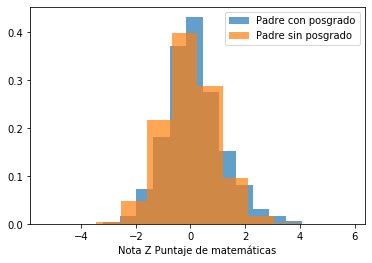

In [104]:
bins = 12

pyplot.hist(df_padre_con_posgrado['PUNT_MATEMATICAS'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['PUNT_MATEMATICAS'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Puntaje de matemáticas')

pyplot.show()

pyplot.hist(df_padre_con_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_MATEMATICAS'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_MATEMATICAS'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Nota Z Puntaje de matemáticas')

pyplot.show()

#### PUNTAJE Y NOTA Z DE CIENCIAS SOCIALES

In [106]:
bins = 10
pyplot.hist(df_padre_con_posgrado['PUNT_CIENCIAS_SOCIALES'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['PUNT_CIENCIAS_SOCIALES'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Puntaje ciencias sociales')

plt.show()

pyplot.hist(df_padre_con_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_CIENCIAS_SOCIALES'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_CIENCIAS_SOCIALES'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Nota Z Puntaje de sociales')

pyplot.show()


/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


#### PUNTAJE Y NOTA Z DE INGLES

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


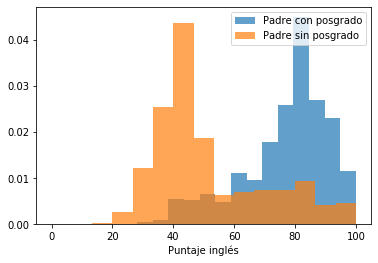

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


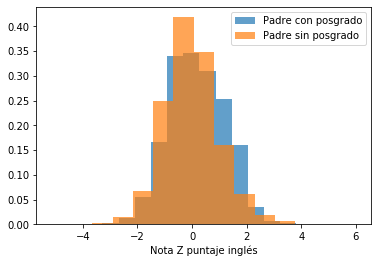

In [119]:
bins = 15
pyplot.hist(df_padre_con_posgrado['PUNT_INGLES'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['PUNT_INGLES'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Puntaje inglés')

plt.show()

bins = 15
pyplot.hist(df_padre_con_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_INGLES'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_INGLES'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Nota Z puntaje inglés')

plt.show()

#### PUNTAJE Y NOTA Z DE BIOLOGIA

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


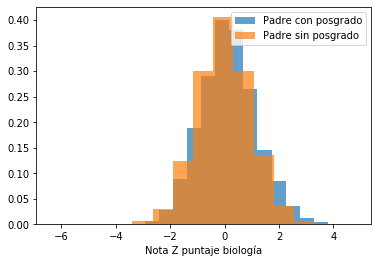

In [111]:
bins = 15
pyplot.hist(df_padre_con_posgrado['PUNT_BIOLOGIA'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['PUNT_BIOLOGIA'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Puntaje biología')

plt.show()

bins = 15
pyplot.hist(df_padre_con_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_BIOLOGIA'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_BIOLOGIA'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Nota Z puntaje biología')

plt.show()

#### PUNTAJE Y NOTA Z DE FILOSOFIA

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


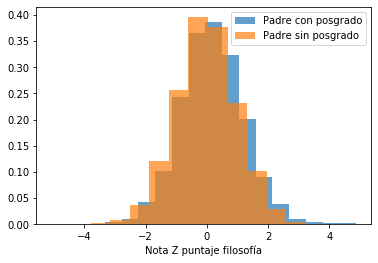

In [112]:
bins = 15
pyplot.hist(df_padre_con_posgrado['PUNT_FILOSOFIA'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['PUNT_FILOSOFIA'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Puntaje filosofía')

plt.show()


bins = 15
pyplot.hist(df_padre_con_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_FILOSOFIA'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_FILOSOFIA'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Nota Z puntaje filosofía')

plt.show()

#### PUNTAJE Y NOTA Z DE FISICA

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


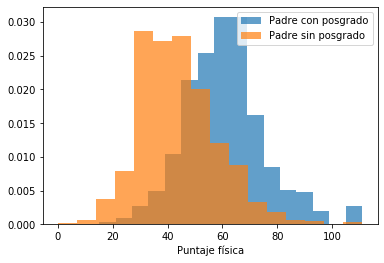

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


In [114]:
bins = 16
pyplot.hist(df_padre_con_posgrado['PUNT_FISICA'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['PUNT_FISICA'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Puntaje física')

plt.show()

bins = 15
pyplot.hist(df_padre_con_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_FISICA'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_FISICA'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Nota Z puntaje física')

plt.show()

#### PUNTAJE Y NOTA Z DE QUIMICA

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


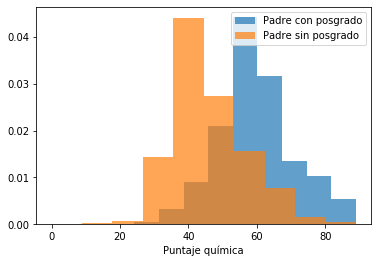

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


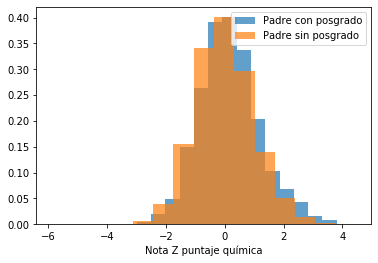

In [116]:
bins = 10
pyplot.hist(df_padre_con_posgrado['PUNT_QUIMICA'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['PUNT_QUIMICA'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Puntaje química')

plt.show()

bins = 15
pyplot.hist(df_padre_con_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_QUIMICA'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_QUIMICA'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Nota Z puntaje química')

plt.show()

#### PUNTAJE Y NOTA Z DE LENGUAJE

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


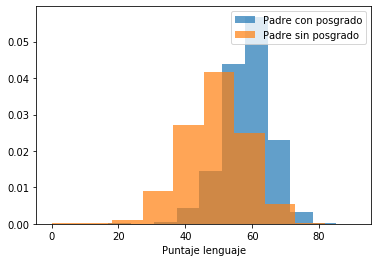

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


In [118]:
bins = 10

pyplot.hist(df_padre_con_posgrado['PUNT_LENGUAJE'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['PUNT_LENGUAJE'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Puntaje lenguaje')

plt.show()

bins = 15
pyplot.hist(df_padre_con_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_LENGUAJE'].values, bins, alpha=0.7, label='Padre con posgrado', normed=1.0)
pyplot.hist(df_padre_sin_posgrado['NOTA_Z_COLE_CODIGO_ICFES_PUNT_LENGUAJE'].values, bins, alpha=0.7, label='Padre sin posgrado', normed=1.0)
pyplot.legend(loc='upper right')
pyplot.xlabel('Nota Z puntaje lenguaje')

plt.show()

# FAMILIA TIENE INTERNET

In [126]:
# ESTU_ANOMATRICULASEXTO
# ESTU_NACIONALIDAD

from matplotlib import pyplot

fami_tiene_internet  = data['FAMI_TIENEINTERNET'].values == 1.0
df_fami_con_internet = data[ fami_tiene_internet]
df_fami_sin_internet = data[~fami_tiene_internet]

In [137]:
def histograms(dfc, dfs, lbc, lbs, variable):
    bins = 12
    pyplot.hist(dfc[variable].values, bins, alpha=0.7, label=lbc, normed=1.0)
    pyplot.hist(dfs[variable].values, bins, alpha=0.7, label=lbs, normed=1.0)
    pyplot.legend(loc='upper right')
    pyplot.xlabel(variable)
    pyplot.show()

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


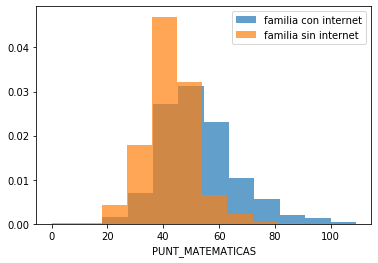

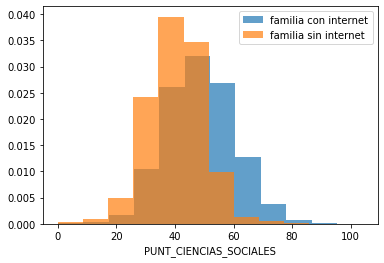

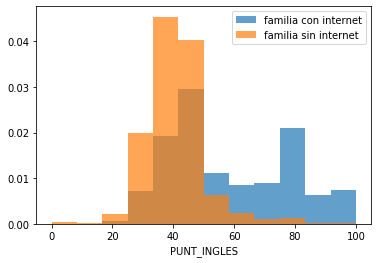

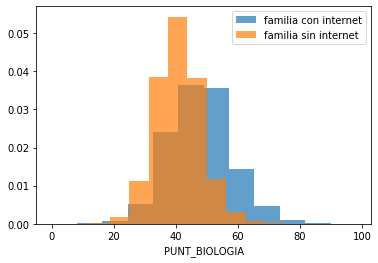

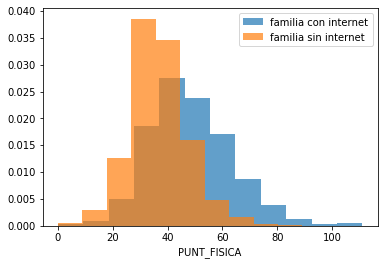

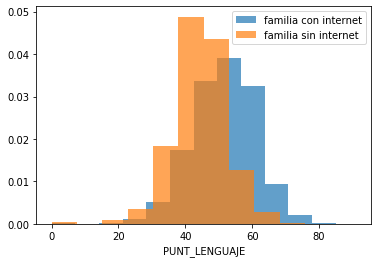

In [139]:
histograms(df_fami_con_internet, df_fami_sin_internet,
           'familia con internet', 'familia sin internet',
           'PUNT_MATEMATICAS')

histograms(df_fami_con_internet, df_fami_sin_internet,
           'familia con internet', 'familia sin internet',
           'PUNT_CIENCIAS_SOCIALES')

histograms(df_fami_con_internet, df_fami_sin_internet,
           'familia con internet', 'familia sin internet',
           'PUNT_INGLES')

histograms(df_fami_con_internet, df_fami_sin_internet,
           'familia con internet', 'familia sin internet',
           'PUNT_BIOLOGIA')

histograms(df_fami_con_internet, df_fami_sin_internet,
           'familia con internet', 'familia sin internet',
           'PUNT_FILOSOFIA')

histograms(df_fami_con_internet, df_fami_sin_internet,
           'familia con internet', 'familia sin internet',
           'PUNT_FISICA')

histograms(df_fami_con_internet, df_fami_sin_internet,
           'familia con internet', 'familia sin internet',
           'PUNT_QUIMICA')

histograms(df_fami_con_internet, df_fami_sin_internet,
           'familia con internet', 'familia sin internet',
           'PUNT_LENGUAJE')

# STUDIANTE REPROBO DECIMO

In [153]:
from matplotlib import pyplot

reprobo_decimo  = data['FAMI_TIENEINTERNET'].values == 1.0
df_si_reprobo_decimo = data[ reprobo_decimo]
df_no_reprobo_decimo = data[~reprobo_decimo]

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


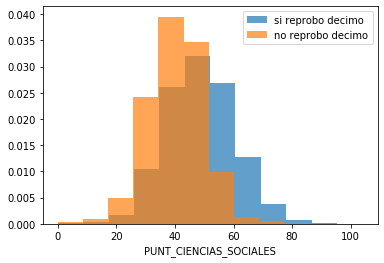

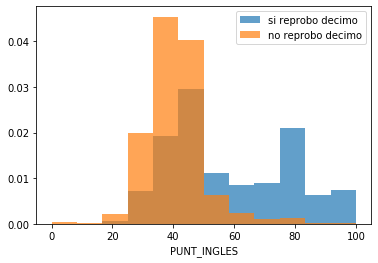

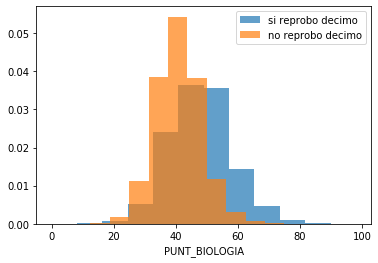

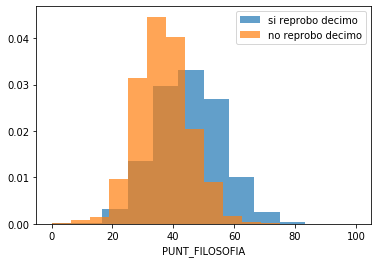

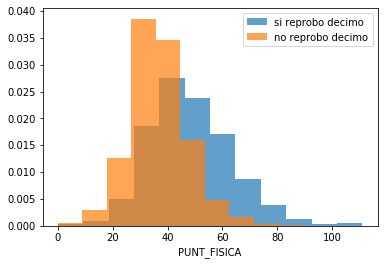

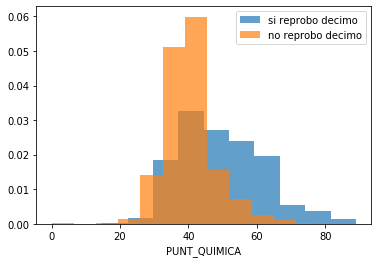

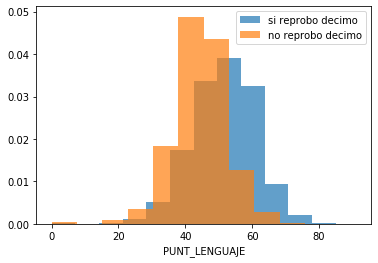

In [154]:
histograms(df_si_reprobo_decimo, df_no_reprobo_decimo,
           'si reprobo decimo', 'no reprobo decimo',
           'PUNT_MATEMATICAS')

histograms(df_si_reprobo_decimo, df_no_reprobo_decimo,
           'si reprobo decimo', 'no reprobo decimo',
           'PUNT_CIENCIAS_SOCIALES')

histograms(df_si_reprobo_decimo, df_no_reprobo_decimo,
           'si reprobo decimo', 'no reprobo decimo',
           'PUNT_INGLES')

histograms(df_si_reprobo_decimo, df_no_reprobo_decimo,
           'si reprobo decimo', 'no reprobo decimo',
           'PUNT_BIOLOGIA')

histograms(df_si_reprobo_decimo, df_no_reprobo_decimo,
           'si reprobo decimo', 'no reprobo decimo',
           'PUNT_FILOSOFIA')

histograms(df_si_reprobo_decimo, df_no_reprobo_decimo,
           'si reprobo decimo', 'no reprobo decimo',
           'PUNT_FISICA')

histograms(df_si_reprobo_decimo, df_no_reprobo_decimo,
           'si reprobo decimo', 'no reprobo decimo',
           'PUNT_QUIMICA')

histograms(df_si_reprobo_decimo, df_no_reprobo_decimo,
           'si reprobo decimo', 'no reprobo decimo',
           'PUNT_LENGUAJE')

# INFLUENCIA DEL CALENDARIO B

In [164]:
#ESTU_ANOSCOLEGIOACTUAL
#ESTU_SERETIROCOLEGIO
#ESTU_NACIONALIDAD
#ESTU_ANOSCOLEGIOACTUAL

# ESTU_ANOMATRICULASEXTO
# ESTU_NACIONALIDAD

from matplotlib import pyplot

calendario_B  = data['COLE_CALENDARIO_B'].values == 1.0
df_si_calendario_B = data[ calendario_B]
df_no_calendario_B = data[~calendario_B]

/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


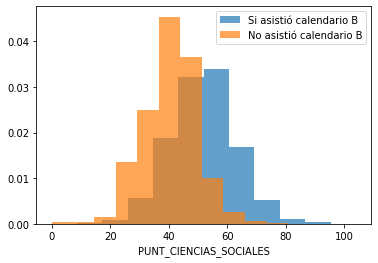

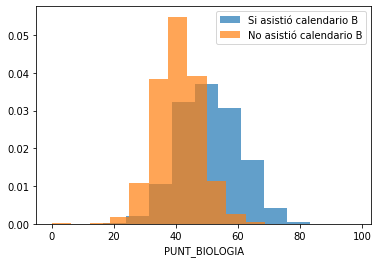

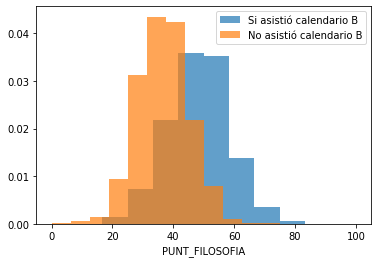

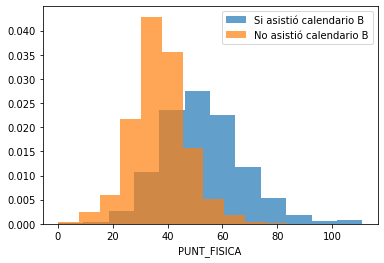

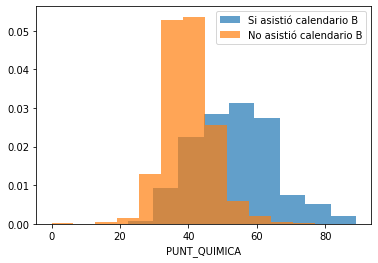

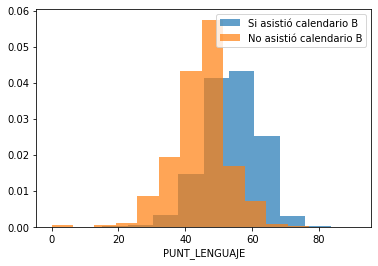

In [165]:
histograms(df_si_calendario_B, df_no_calendario_B,
           'Si asistió calendario B', 'No asistió calendario B',
           'PUNT_MATEMATICAS')

histograms(df_si_calendario_B, df_no_calendario_B,
           'Si asistió calendario B', 'No asistió calendario B',
           'PUNT_CIENCIAS_SOCIALES')

histograms(df_si_calendario_B, df_no_calendario_B,
           'Si asistió calendario B', 'No asistió calendario B',
           'PUNT_INGLES')

histograms(df_si_calendario_B, df_no_calendario_B,
           'Si asistió calendario B', 'No asistió calendario B',
           'PUNT_BIOLOGIA')

histograms(df_si_calendario_B, df_no_calendario_B,
           'Si asistió calendario B', 'No asistió calendario B',
           'PUNT_FILOSOFIA')

histograms(df_si_calendario_B, df_no_calendario_B,
           'Si asistió calendario B', 'No asistió calendario B',
           'PUNT_FISICA')

histograms(df_si_calendario_B, df_no_calendario_B,
           'Si asistió calendario B', 'No asistió calendario B',
           'PUNT_QUIMICA')

histograms(df_si_calendario_B, df_no_calendario_B,
           'Si asistió calendario B', 'No asistió calendario B',
           'PUNT_LENGUAJE')

# ESTU_NACIONALIDAD

In [170]:
from matplotlib import pyplot

Nacionalidad  = data['ESTU_NACIONALIDAD'].values == 1.0
df_si_Colombiano = data[ Nacionalidad]
df_no_Colombiano = data[~Nacionalidad]
print(df_si_Colombiano.values.shape)
print(df_no_Colombiano.values.shape)

(24814, 278)
(79, 278)


/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lfardilap/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


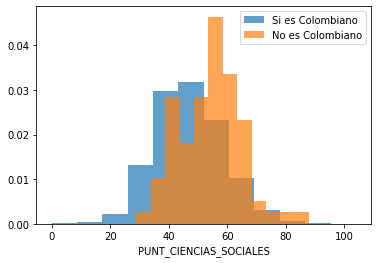

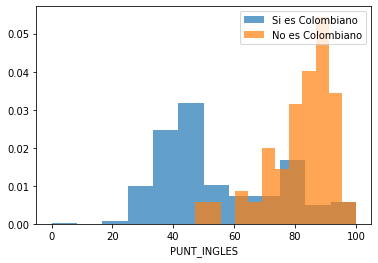

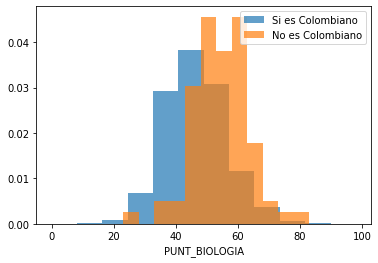

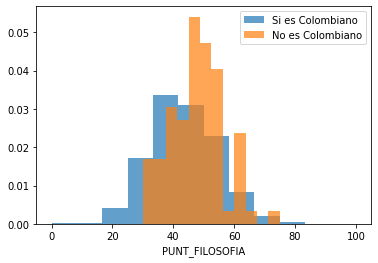

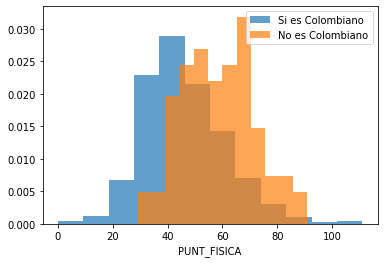

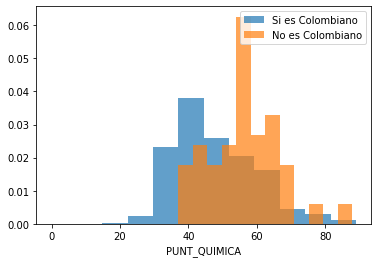

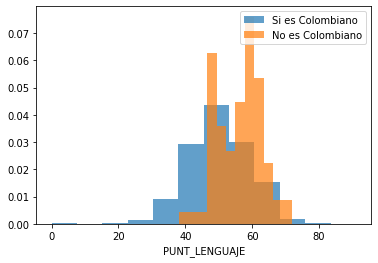

In [169]:
histograms(df_si_Colombiano, df_no_Colombiano,
           'Si es Colombiano', 'No es Colombiano',
           'PUNT_MATEMATICAS')

histograms(df_si_Colombiano, df_no_Colombiano,
           'Si es Colombiano', 'No es Colombiano',
           'PUNT_CIENCIAS_SOCIALES')

histograms(df_si_Colombiano, df_no_Colombiano,
           'Si es Colombiano', 'No es Colombiano',
           'PUNT_INGLES')

histograms(df_si_Colombiano, df_no_Colombiano,
           'Si es Colombiano', 'No es Colombiano',
           'PUNT_BIOLOGIA')

histograms(df_si_Colombiano, df_no_Colombiano,
           'Si es Colombiano', 'No es Colombiano',
           'PUNT_FILOSOFIA')

histograms(df_si_Colombiano, df_no_Colombiano,
           'Si es Colombiano', 'No es Colombiano',
           'PUNT_FISICA')

histograms(df_si_Colombiano, df_no_Colombiano,
           'Si es Colombiano', 'No es Colombiano',
           'PUNT_QUIMICA')

histograms(df_si_Colombiano, df_no_Colombiano,
           'Si es Colombiano', 'No es Colombiano',
           'PUNT_LENGUAJE')